# Dimensionality Reduction and Projection

The final major topic of this course is **Principal Component Analysis (PCA)**. The goal of PCA is to reduce the number of columns (the dimensions) of a dataset while preserving as much of the original information as possible. In short, PCA makes a dataset "skinnier" by intelligently combining features.

### Why Reduce Dimensions?
1.  **Manageability:** Real-world datasets can have hundreds or thousands of features. Reducing the number of columns makes the data easier to work with, store, and model.
2.  **Visualization:** It's impossible to visualize data in more than three dimensions. By reducing a high-dimensional dataset to just two or three "principal components," we can create meaningful scatter plots to look for patterns.

Simply deleting columns is a bad approach because we lose all the valuable information they contained. PCA is designed to address this by **projecting** the data into a lower-dimensional space in a way that retains the most important information.

---
## The Concept of Projection

Projection is the process of moving data points from a higher-dimensional space onto a lower-dimensional one (like a line or a plane).

Imagine we have a simple 2D dataset and we want to project it onto the line defined by the equation `y = x`. This means we want to find the "shadow" that each point casts on that line.

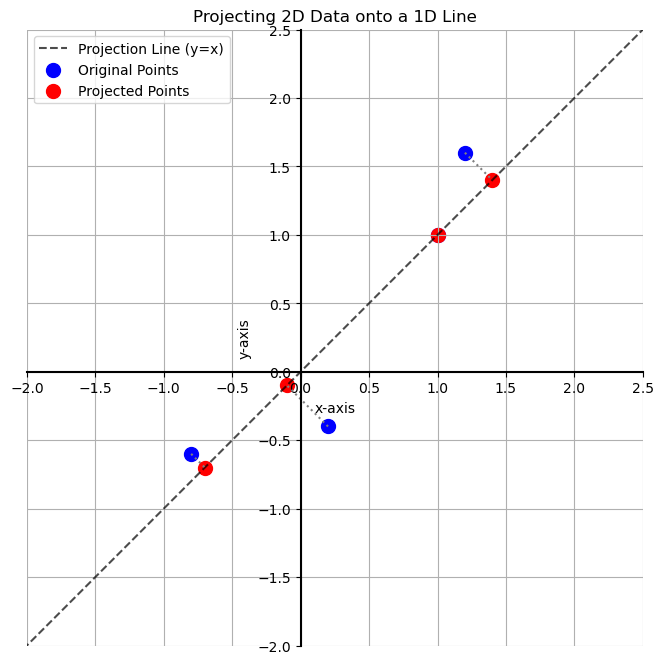

In [2]:
# --- A Note on the Code in This Section ---
# The Python code in these notebooks serves one purpose: to generate the visualizations
# that illustrate the mathematical concepts. You do not need to understand the code
# itself to learn the theory.

import numpy as np
import matplotlib.pyplot as plt

# --- Define the 2D dataset ---
data = np.array([[1, 1], [1.2, 1.6], [0.2, -0.4], [-0.8, -0.6]])

# --- Define the line to project onto (y=x) ---
line_vector = np.array([1, 1])
# Normalize the vector to have a norm of 1
line_unit_vector = line_vector / np.linalg.norm(line_vector)

# --- Project the data ---
# The projection of a point 'p' onto a unit vector 'u' is (p · u) * u
projections = (data @ line_unit_vector).reshape(-1, 1) @ line_unit_vector.reshape(1, -1)

# --- Plot the results ---
plt.figure(figsize=(8, 8))

# Plot the projection line
plt.plot([-3, 3], [-3, 3], 'k--', alpha=0.7, label='Projection Line (y=x)')

# Plot the original points
plt.scatter(data[:, 0], data[:, 1], c='blue', s=100, label='Original Points')

# Plot the projected points
plt.scatter(projections[:, 0], projections[:, 1], c='red', s=100, label='Projected Points')

# Draw the projection lines
for i in range(data.shape[0]):
    plt.plot([data[i, 0], projections[i, 0]], [data[i, 1], projections[i, 1]], 'gray', linestyle=':')

# --- Format the plot ---
plt.xlim(-2, 2.5)
plt.ylim(-2, 2.5)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Projecting 2D Data onto a 1D Line')
plt.grid(True)
plt.legend()

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

---

## The Math of Projection

How do we calculate the location of these new, projected points? The process uses the dot product and the norm.

To project a matrix of data `A` onto the direction given by a vector `v`, we use the following formula:

$ A_{proj} = A \cdot \frac{v}{||v||_2} $

Let's break this down:
1.  **Normalize the Direction Vector:** We first divide the vector `v` by its L2-norm (`||v||_2`). This creates a **unit vector** that points in the same direction but has a length of 1. This is crucial because it ensures our projection only changes the position of the points, not their scale.
2.  **Take the Dot Product:** We then take the dot product of our data matrix `A` with this new unit vector. This calculates the new, 1-dimensional coordinates for each of our data points along the projection line.

For our 2D data and the projection line `y=x` (defined by the vector `v = [1, 1]`), we have successfully reduced our dataset from a table with **two columns** (x and y coordinates) to a single vector with **one column** (the distance along the line).

---
## Generalizing the Projection

We can project our data onto multiple vectors at once. Projecting onto two vectors is the same as projecting onto the **plane** that those vectors span.

To do this, we simply create a matrix `V` where each column is one of our (normalized) direction vectors. The final projection formula is an elegant matrix multiplication:

> $ A_p = A \cdot V $

* If `A` is an `r x c` matrix (r rows, c columns)
* And `V` is a `c x k` matrix (c rows, k new dimensions)
* The resulting projected matrix `A_p` will be `r x k`.

The data now has the same number of rows but has been reduced from `c` dimensions to `k` dimensions.

The key question now is: how do we pick the best vectors or the best line to project onto? That is what PCA will help us determine.